In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, transform, exposure
import cv2
from numba import jit
import matplotlib as mpl

In [2]:
nebula_alpha = io.imread('imagens_teste/southern_ring_nebula.png')
print("Shape of nebula: ", nebula_alpha.shape)
baboon = io.imread('imagens_teste/baboon.tiff')
print("Shape of baboon: ", baboon.shape)
earth = io.imread('imagens_teste/Earth.bmp')
print("Shape of earth: ", earth.shape)
dog = io.imread('imagens_teste/Malamute.bmp')
print("Shape of dpg: ", dog.shape)
rua = io.imread('imagens_teste/IMG_5439.JPG')
print("Shape of rua: ", rua.shape)
statue = io.imread('imagens_teste/IMG_5387.JPG')
print("Shape of statue: ", statue.shape)
panda = io.imread('imagens_teste/panda.jpg')
print("Shape of statue: ", panda.shape)
lenna = io.imread('imagens_teste/lenna.png')
print("Shape of statue: ", lenna.shape)
com_copo = io.imread('imagens_teste/com_copo.jpeg')
print("Shape of statue: ", com_copo.shape)
sem_copo = io.imread('imagens_teste/sem_copo.jpeg')
print("Shape of statue: ", sem_copo.shape)
sem_exp = io.imread('imagens_teste/sem_exp.png')
com_exp = io.imread('imagens_teste/com_exp.png')

Shape of nebula:  (720, 770, 4)
Shape of baboon:  (512, 512, 3)
Shape of earth:  (768, 749, 3)
Shape of dpg:  (1080, 1616, 3)
Shape of rua:  (1728, 2592, 3)
Shape of statue:  (1728, 2592, 3)
Shape of statue:  (512, 512, 3)
Shape of statue:  (512, 512, 3)
Shape of statue:  (1600, 900, 3)
Shape of statue:  (1600, 900, 3)


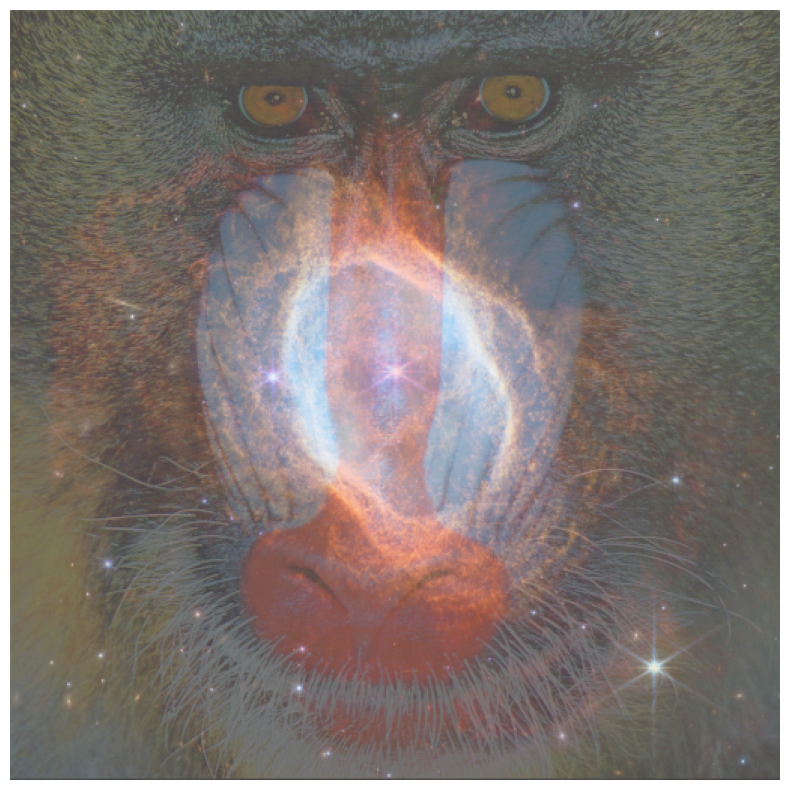

In [3]:
#babuino estelar
plt.figure(figsize=(10,10))

nebulosa_baboon = transform.resize(nebula_alpha, (512, 512), anti_aliasing=True)

plt.imshow(baboon, alpha=0.5)
plt.imshow(nebulosa_baboon, alpha=0.5)




plt.axis('off')
plt.show()

In [4]:
#tirando alpha de nebula
nebula = nebula_alpha[:,:,:3]
print(nebula.shape)

#nebula cinza
gray_nebula = color.rgb2gray(nebula)
print(gray_nebula.shape)
x = np.array(gray_nebula)


(720, 770, 3)
(720, 770)


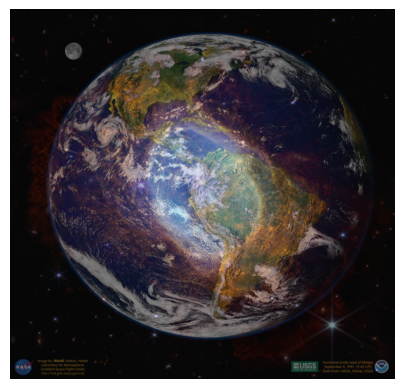

In [5]:
#soma de imagens
nebula_earth = transform.resize(nebula, (720,749), anti_aliasing=True)
earth_nebula = transform.resize(earth, (720,749), anti_aliasing=True)

def sum_img(img1, x, img2, y):
    new_img = x*img1 + y*img2
    return new_img

sum_nebula_earth = sum_img(nebula_earth,0.5,earth_nebula,0.5)

plt.imshow(sum_nebula_earth)
plt.axis('off')
plt.show()

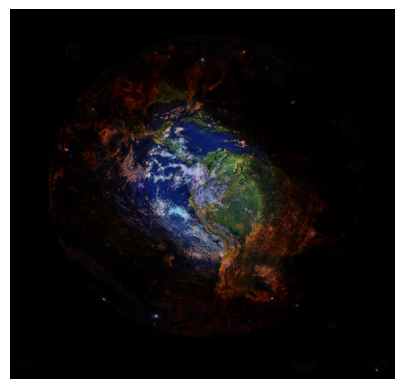

In [6]:
#multiplicação de imagens
def mult_img(img1,img2):
    new_img = img1 * img2
    return new_img

mult_nebula_earth = mult_img(nebula_earth,earth_nebula)

plt.imshow(mult_nebula_earth)
plt.axis('off')
plt.show()


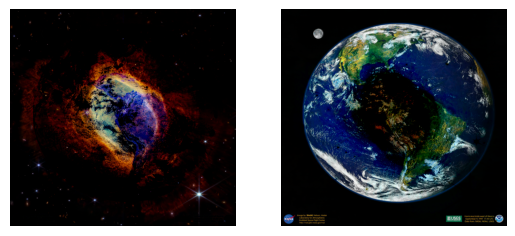

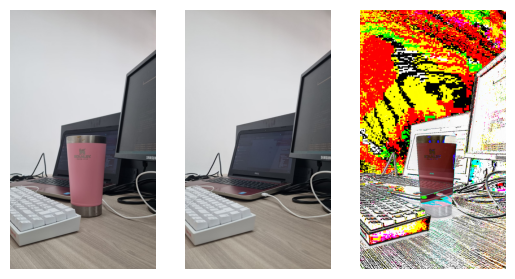

In [7]:
#subtração de imagens
def subt_img(img1, img2):
    new_img = np.clip(img1 - img2, 0, 255)
    return new_img

subt_nebula_earth = subt_img(nebula_earth, earth_nebula)
subt_earth_nebula = subt_img(earth_nebula,nebula_earth)

plt.subplot(1,2,1)
plt.imshow(subt_nebula_earth)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(subt_earth_nebula)
plt.axis('off')
plt.show()

subt_copo = subt_img(com_copo,sem_copo)

plt.subplot(1,3,1)
plt.imshow(com_copo)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sem_copo)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(subt_copo)
plt.axis('off')
plt.show()


In [8]:
#normalização
def normar(img):
    for i in range(img.shape[1]):
      array = img[:,i]
      min_val = np.min(array)
      max_val = np.max(array)
      normalized_array = 255 * ((array - min_val) / (max_val - min_val))
      img[:,i] = normalized_array.astype(np.uint8)
    return img.astype(np.uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


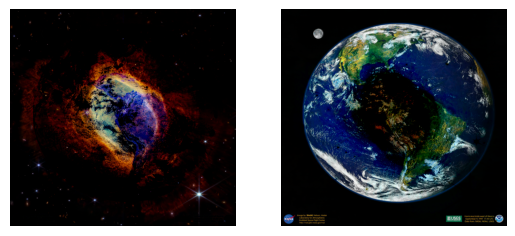

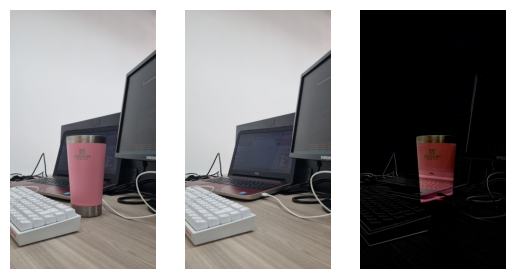

In [9]:
#subtração de imagens skimage
#subtração de imagens
def subt_img(img1, img2):
    new_img = np.clip(img1 - img2, 0, 255)
    return new_img

subt_nebula_earth = cv2.subtract(nebula_earth, earth_nebula)
subt_earth_nebula = cv2.subtract(earth_nebula,nebula_earth)

plt.subplot(1,2,1)
plt.imshow(subt_nebula_earth)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(subt_earth_nebula)
plt.axis('off')
plt.show()

subt_copo = cv2.subtract(com_copo,sem_copo)

plt.subplot(1,3,1)
plt.imshow(com_copo)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sem_copo)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(subt_copo)
plt.axis('off')
plt.show()


(720, 749)
(720, 749)


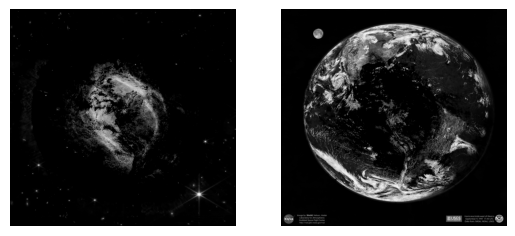

(1600, 900)


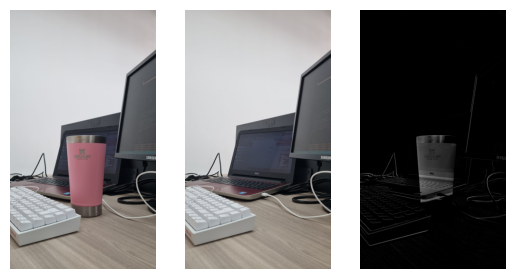

In [10]:
#subtração de imagens pixel à pixel

def subt_img(img1, img2):
    img1 = color.rgb2gray(img1)
    img2 = color.rgb2gray(img2)
    new_image = np.zeros((img1.shape[0],img1.shape[1]))
    print(new_image.shape)
    for i in range(0,(img1.shape[0])):
        for j in range(0,(img1.shape[1])):
            new_image[i,j] = np.clip(img1[i,j] - img2[i,j],0,255)
            value = new_image[i,j]
            if value < 25:
                new_image[i,j] == 0
            else:
                continue
    new_image = color.gray2rgb(new_image)
    return new_image

subt_nebula_earth = subt_img(nebula_earth, earth_nebula)
subt_earth_nebula = subt_img(earth_nebula,nebula_earth)

plt.subplot(1,2,1)
plt.imshow(subt_nebula_earth)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(subt_earth_nebula)
plt.axis('off')
plt.show()

subt_copo = subt_img(com_copo,sem_copo)

plt.subplot(1,3,1)
plt.imshow(com_copo)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sem_copo)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(subt_copo)
plt.axis('off')
plt.show()

In [24]:
#histogramas de imagem
def histogram_gray(img):
    if img.ndim == 3:
        img = color.rgb2gray(img)
    else:
        img = img
    hist = np.zeros((256),dtype=np.int64)
    acompanhante = np.zeros((256),dtype=np.int64)
    for i in range(0,(img.shape[0])):
        for j in range(0,(img.shape[1])):
            value = np.clip(int(img[i,j]*255),0,255)
            hist[value] += 1
    return hist

def histogram(img):
    hist = np.zeros((256),dtype=np.int64)
    acompanhante = np.zeros((256),dtype=np.int64)
    for i in range(0,(img.shape[0])):
        for j in range(0,(img.shape[1])):
            value = np.clip(int(img[i,j]*255),0,255)
            hist[value] += 1
    return hist

hist_baboon = histogram_gray(baboon)


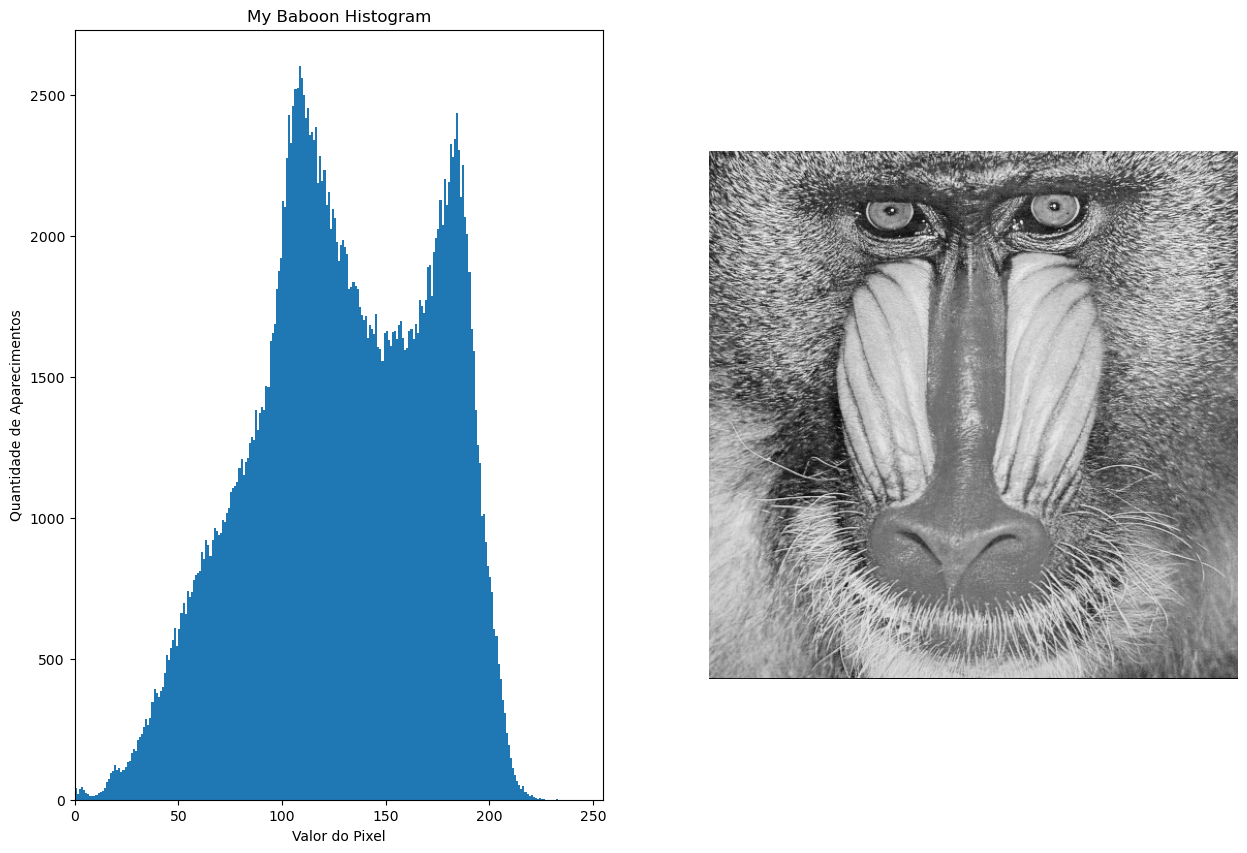

In [12]:
#print(color.rgb2gray(nebula))
gray_baboon = color.rgb2gray(baboon)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.stairs(hist_baboon, fill=True,lw=10)
plt.xlim(0,255)
plt.xlabel('Valor do Pixel')
plt.ylabel('Quantidade de Aparecimentos')
plt.title('My Baboon Histogram')
plt.subplot(1,2,2)
plt.imshow(gray_baboon,cmap='gray')
plt.axis('off')
plt.show()





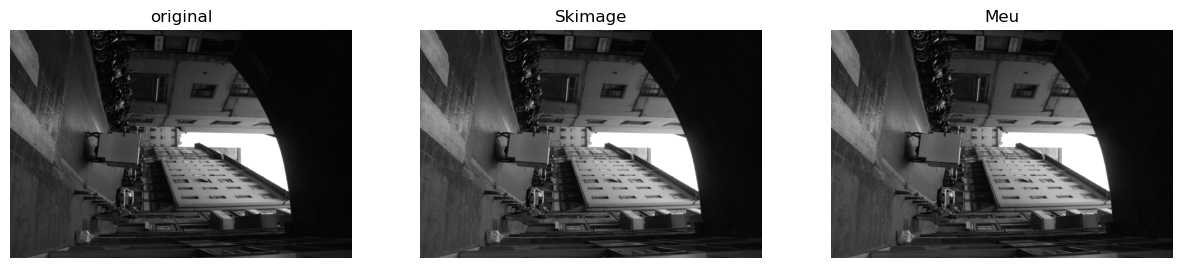

In [13]:
#logaritmo de imagem
def log_img(img):
    c = 255/(np.log(1+np.max(img)))
    img1 = c*((np.log(img+1)))
    
    return img1.astype(np.uint8)
gray_rua = color.rgb2gray(rua)
log_rua = log_img(gray_rua)
log_rua_skimg = exposure.adjust_log(gray_rua)

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(gray_rua, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Skimage')
plt.imshow(log_rua_skimg, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Meu')
plt.imshow(log_rua, cmap='gray')
plt.axis('off')
plt.show()

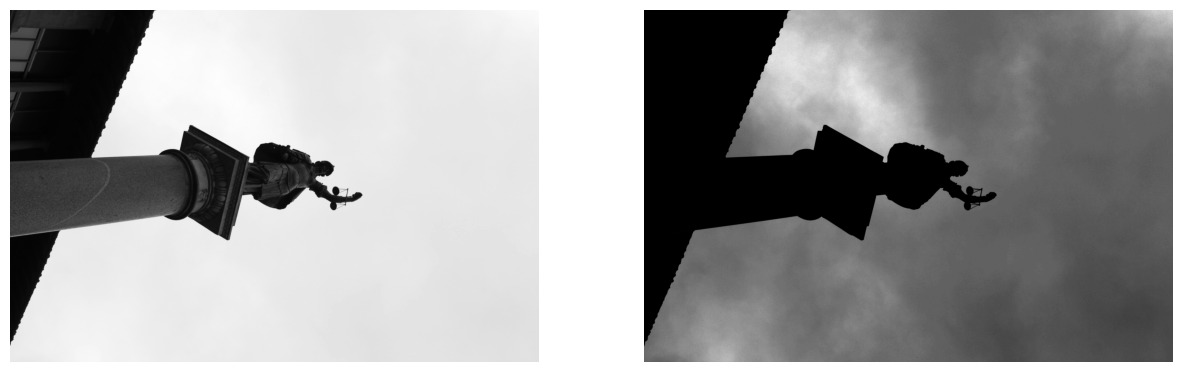

In [14]:
#exponencial de imagem
def exp_img(img,k): #intensidade da transformação
    c = 255/(np.exp(np.max(img*255*k)+1))
    img1 = (np.exp(1+img*255*k))*c -1
    return img1


com_exp_gray =color.rgb2gray(com_exp[:,:,:3])
celula_gray = color.rgb2gray(sem_exp[:,:,:3])
meu_exp = exp_img(celula_gray,0.04)
gray_statue = color.rgb2gray(statue)
exp_statue = exp_img(gray_statue,0.05)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(gray_statue, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(exp_statue, cmap='gray')
plt.axis('off')
plt.show()

(512, 512)
(512, 512)
espaço
[  42   21   37   46   35   23   22   14   13   13   16   24   27   31
   41   63   75   95  102  123  105  112   98  105  116  135  136  167
  181  172  212  223  232  258  287  264  290  346  391  380  366  385
  401  451  514  496  537  568  610  545  605  662  698  660  742  720
  737  779  797  804  812  877  855  920  902  864  921  965  954  939
  947  992  986 1017 1034 1090 1106 1114 1127 1176 1208 1152 1197 1211
 1264 1287 1275 1384 1310 1371 1393 1382 1469 1464 1627 1655 1689 1810
 1875 1923 2122 2103 2275 2430 2329 2462 2521 2526 2601 2561 2501 2418
 2454 2356 2369 2341 2386 2186 2284 2195 2235 2109 2156 2023 2096 2063
 1979 1910 1966 1986 1959 1936 1813 1817 1835 1822 1811 1746 1719 1702
 1717 1639 1684 1671 1651 1724 1604 1599 1556 1654 1662 1629 1609 1660
 1664 1635 1684 1697 1638 1594 1601 1663 1668 1634 1686 1656 1774 1750
 1725 1773 1888 1895 1787 1941 1992 2024 2127 2040 2200 2108 2191 2324
 2278 2343 2435 2303 2137 2250 2068 2008 1871 16

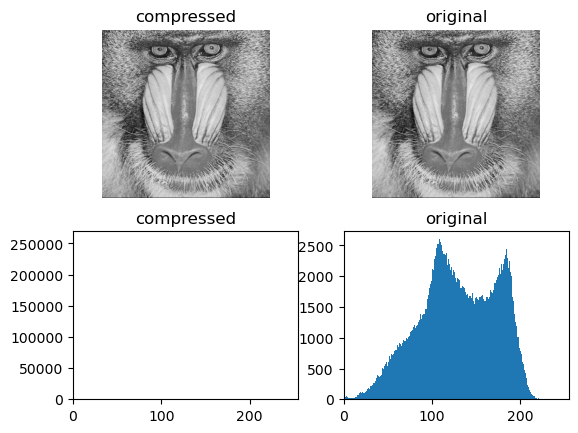

In [30]:
#compressão de imagem
def compression(img,c): #c é força de compressão
    new_img = img
    for i in range(0, new_img.shape[0]):
        for j in range(0, new_img.shape[1]):
            if (new_img[i,j] <= 127):
                dist = new_img[i,j]
                new_img[i,j] = new_img[i,j] + (dist/c)
            else:
                dist = 255 - new_img[i,j]
                new_img[i,j] = new_img[i,j] - (dist/c)
    
    return new_img


compressed_baboon = compression(gray_baboon, 5)
print(compressed_baboon.shape)
print(gray_baboon.shape)
hist_compressed = histogram_gray(compressed_baboon)
hist_baboon = histogram_gray(baboon)

#print(hist_compressed)
print('espaço')
print(hist_baboon)


plt.subplot(2,2,1)
plt.imshow(compressed_baboon, cmap='gray')
plt.title('compressed')
plt.axis('off')
plt.subplot(2,2,2)
plt.title('original')
plt.imshow(gray_baboon, cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.stairs(hist_compressed, fill=True,lw=10)
plt.title('compressed')
plt.xlim(0,255)
plt.subplot(2,2,4)
plt.title('original')
plt.stairs(hist_baboon, fill=True,lw=10)
plt.xlim(0,255)

plt.show()

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


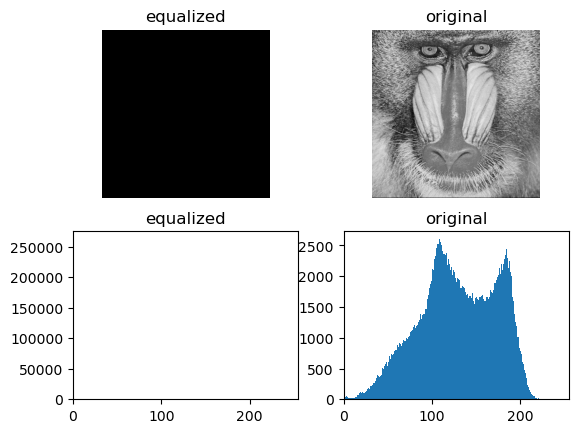

In [33]:
#equalização
def eq_img(img):
    cdf = np.cumsum(img)
    new_img = np.copy(img)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            new_img[i][j] = int(((new_img[i][j] - np.min(cdf))/((img.shape[0]*img.shape[1])-np.min(cdf)))*(255))+1
    return new_img

equalized_baboon = eq_img(gray_baboon)
print(equalized_baboon)
#norm_eq = normar(equalized_baboon)
#norm_grayb = normar(gray_baboon)
hist_comp = histogram_gray(equalized_baboon)
hist_gray = histogram_gray(baboon)

plt.subplot(2,2,1)
plt.imshow(equalized_baboon, cmap='gray')
plt.title('equalized')
plt.axis('off')
plt.subplot(2,2,2)
plt.title('original')
plt.imshow(gray_baboon, cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.stairs(hist_comp, fill=True,lw=10)
plt.title('equalized')
plt.xlim(0,255)
plt.subplot(2,2,4)
plt.title('original')
plt.stairs(hist_gray, fill=True,lw=10)
plt.xlim(0,255)

plt.show()
